In [60]:
#Básicos para manipulacion de datos 
import pandas as pd
import numpy as np
#Graficas 
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
sns.set_theme()
#Optimización multiobjetivo 
from pymoo.optimize import minimize
from pymoo.termination import get_termination
from pymoo.problems import get_problem
#Algoritmo 
from pymoo.core.repair import Repair
from pymoo.algorithms.moo.nsga2 import NSGA2
#Visualización
from pymoo.visualization.scatter import Scatter
#Población total 
from tqdm import tqdm
from itertools import compress
from pymoo.core.population import Population

class Simplex_Repair(Repair):
    def _do(self, problem, X, **kwargs):
        negatives = np.any(X<0, axis=1)
        X[negatives]= X[negatives]-np.min(X[negatives], axis=1)[:, None]  
        X[X < 1e-3] = 0
        return X / X.sum(axis=1, keepdims=True)

In [59]:
#Algoritmo de Solución
nsga2 =NSGA2(pop_size=100, repair=Simplex_Repair())
termination = ('n_gen', 250)

In [61]:
def get_best_opt(population,A = None,  tol=1e-6):
  pop_size, n_obj = population.shape
  #Copia de poblacion
  population = population[:]
  #Guardamos los índices 
  indx = range(pop_size)
  #Archivo fantasma inicial 
  if A is None: 
      A = np.array( [[np.inf]*n_obj])
  best_idx = [None]
  #Iterar sobre los portafolios
  for idx,row in tqdm(zip(indx,population)):
  #for idx, row in zip(indx, population):
    test1 = (A <= row).all(axis=1)
    test2 = np.linalg.norm(A-row, ord=1, axis=1) > tol
    if not ((test1) & (test2)).any(): 
      A = np.vstack([A,row])
      best_idx.append(idx)
      test1 = (row <= A).all(axis=1)
      test2 = np.linalg.norm(row- A, ord=1, axis=1)> tol
      A = A[~((test1) & (test2)) ,:]
      best_idx = list(compress(best_idx,~((test1) & (test2))))
  return A, best_idx

def get_full_population(res):     
    all_pop = Population()
    for algo in res.history:
        all_pop = Population.merge(all_pop, algo.off)
    X = all_pop.get('X')
    F = all_pop.get('F')
    return X, F 

dtlz1 n_objetivos: 3 n_variables: 12


25000it [00:02, 8971.15it/s] 


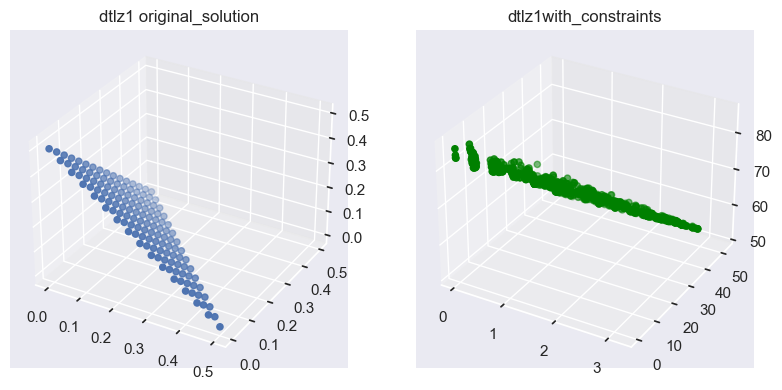

dtlz2 n_objetivos: 3 n_variables: 12


25000it [00:05, 4583.86it/s]


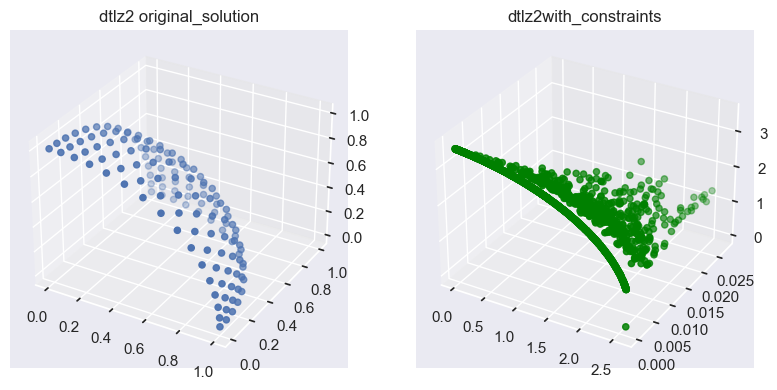

dtlz3 n_objetivos: 3 n_variables: 12


25000it [00:01, 19403.04it/s]


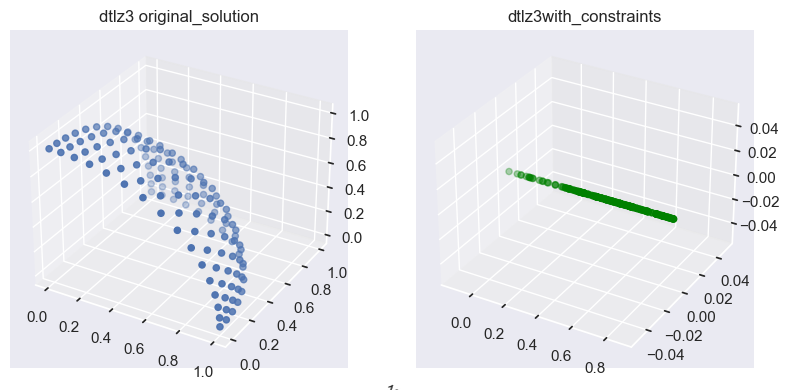

dtlz4 n_objetivos: 3 n_variables: 12


25000it [00:21, 1152.84it/s]


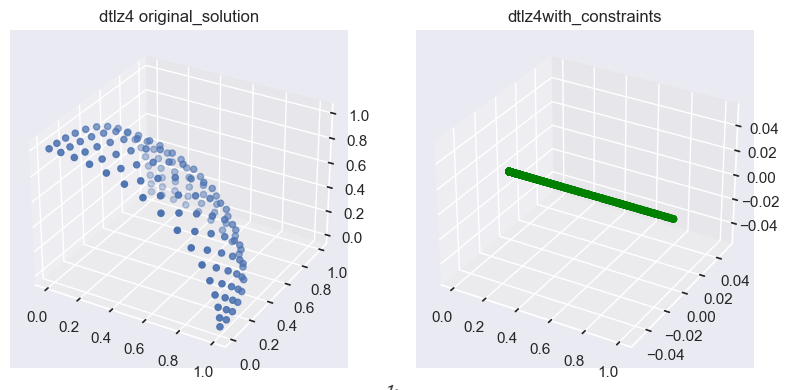

dtlz5 n_objetivos: 3 n_variables: 12


25000it [00:14, 1696.56it/s]


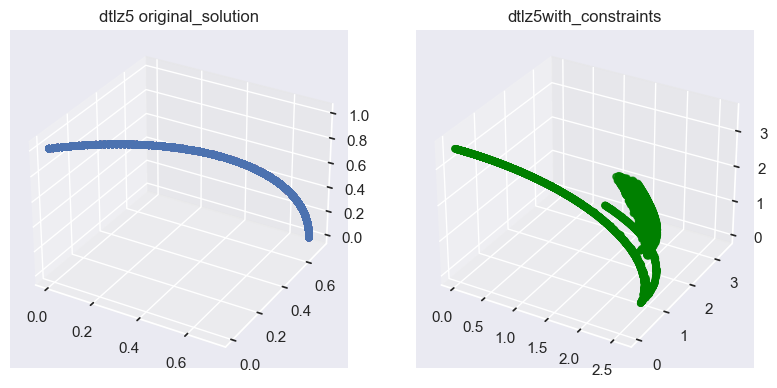

dtlz6 n_objetivos: 3 n_variables: 12


25000it [00:40, 624.98it/s] 


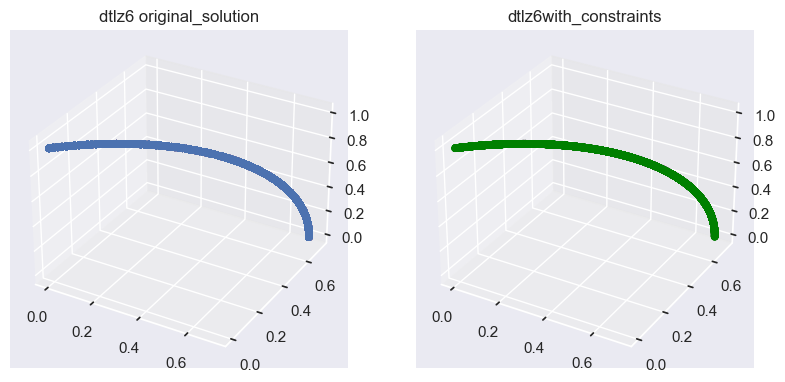

dtlz7 n_objetivos: 3 n_variables: 12


25000it [01:56, 215.06it/s]


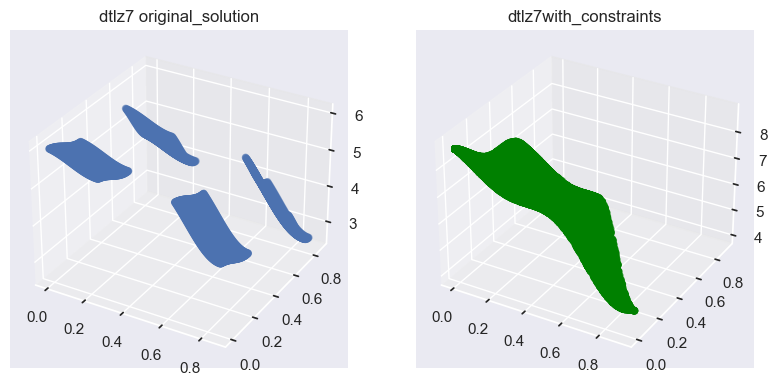

In [4]:
#Definición de problemas 
dtlz_problems = ['dtlz1', 'dtlz2', 'dtlz3', 'dtlz4', 'dtlz5', 'dtlz6', 'dtlz7']
dtlz_vars = [12]*len(dtlz_problems)
dtlz_obj  = [3]*len(dtlz_problems)
for i in range(len(dtlz_problems)): 
    dtlz = get_problem(dtlz_problems[i], n_var=dtlz_vars[i], n_obj=dtlz_obj[i])
    print(dtlz_problems[i], 'n_objetivos:', dtlz.n_obj, 'n_variables:', dtlz.n_var)
    F_orig = dtlz.pareto_front()
    #Solución NSGA-II with constraints tras archivar 
    res  = minimize(problem=dtlz, 
                    algorithm=nsga2, 
                    termination =termination, 
                    save_history =True)
    X, F = get_full_population(res)
    F_opt, idx = get_best_opt(F)
    
    fig = plt.figure(figsize=plt.figaspect(0.5))
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.scatter(F_orig[:, 0], F_orig[:, 1], F_orig[:, 2])
    plt.title(dtlz_problems[i]+' original_solution')
    ax = fig.add_subplot(1, 2, 2, projection='3d')
    ax.scatter(F_opt[:, 0], F_opt[:, 1], F_opt[:, 2], color='green')
    plt.title(dtlz_problems[i]+'with_constraints')
    plt.show()

zdt4 n_objetivos: 2 n_variables: 10


25000it [00:03, 7593.38it/s] 


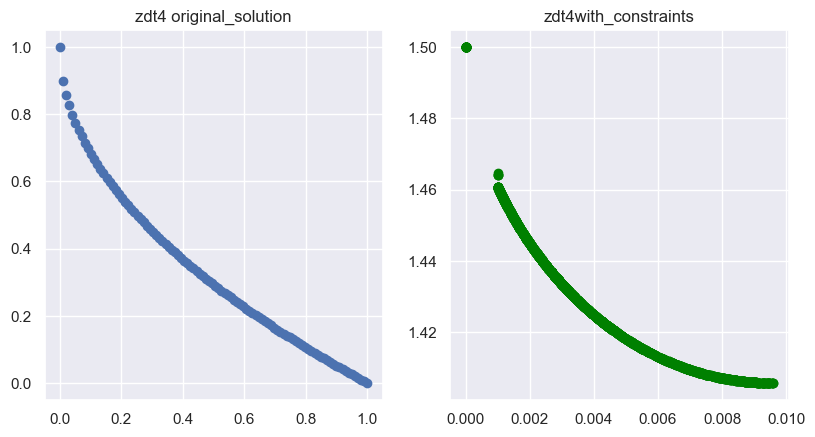

In [62]:
zdt_problems = ['zdt4']
for i in range(len(zdt_problems)): 
    zdt = get_problem(zdt_problems[i])
    print(zdt_problems[i], 'n_objetivos:', zdt.n_obj, 'n_variables:', zdt.n_var)
    F_orig = zdt.pareto_front()
    #Solución NSGA-II with constraints tras archivar 
    res  = minimize(problem=zdt, 
                    algorithm=nsga2, 
                    termination =termination, 
                    save_history =True)
    X, F = get_full_population(res)
    F_opt, idx = get_best_opt(F)
    
    fig = plt.figure(figsize=plt.figaspect(0.5))
    ax = fig.add_subplot(1, 2, 1)
    ax.scatter(F_orig[:, 0], F_orig[:, 1])
    plt.title(zdt_problems[i]+' original_solution')
    ax = fig.add_subplot(1, 2, 2)
    ax.scatter(F_opt[:, 0], F_opt[:, 1], color='green')
    plt.title(zdt_problems[i]+'with_constraints')
    plt.show()

zdt1 n_objetivos: 2 n_variables: 30


25000it [01:57, 212.79it/s]


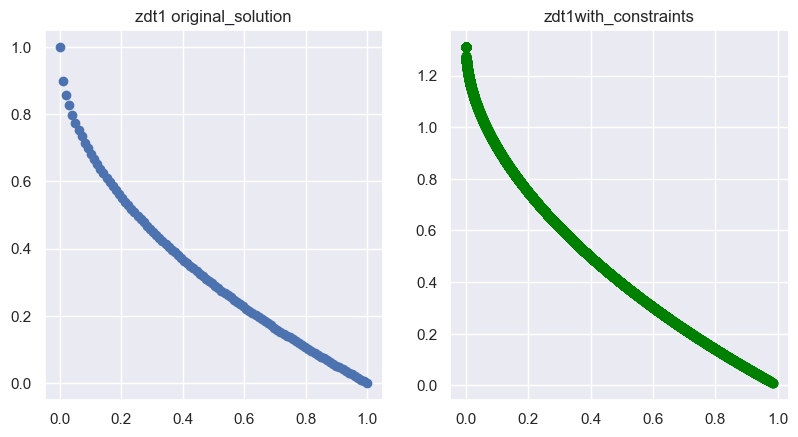

zdt2 n_objetivos: 2 n_variables: 30


25000it [01:47, 231.76it/s]


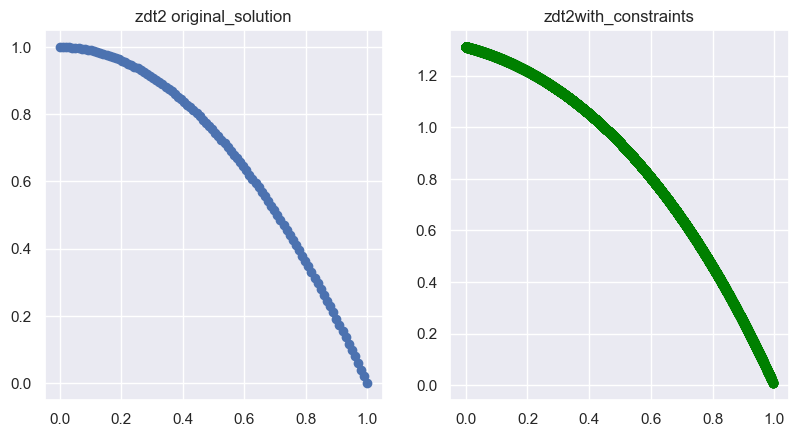

zdt3 n_objetivos: 2 n_variables: 30


25000it [01:29, 278.84it/s]


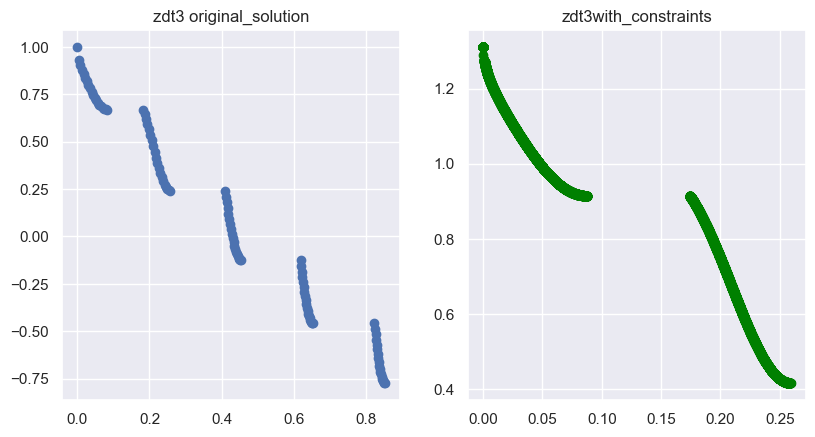

zdt4 n_objetivos: 2 n_variables: 10


C:\Users\yeudi\AppData\Local\Temp\ipykernel_1680\3324610845.py:26: RuntimeWarning: invalid value encountered in divide
  return X / X.sum(axis=1, keepdims=True)
25000it [01:39, 251.78it/s] 


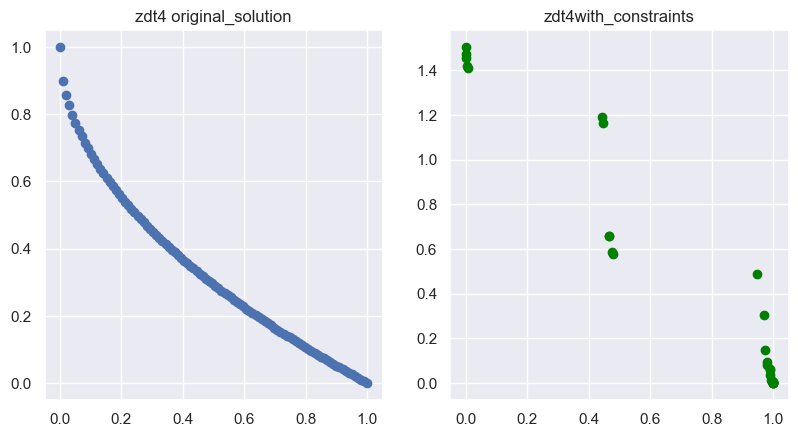

zdt5 n_objetivos: 2 n_variables: 80


25000it [01:52, 221.53it/s]


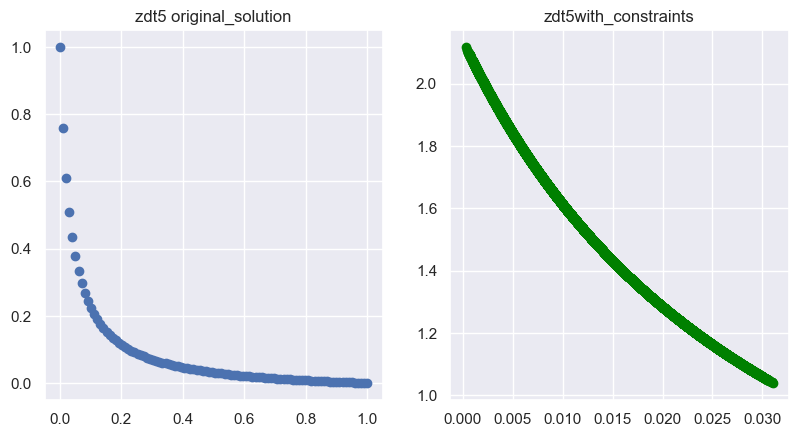

zdt6 n_objetivos: 2 n_variables: 10


25000it [00:20, 1246.20it/s]


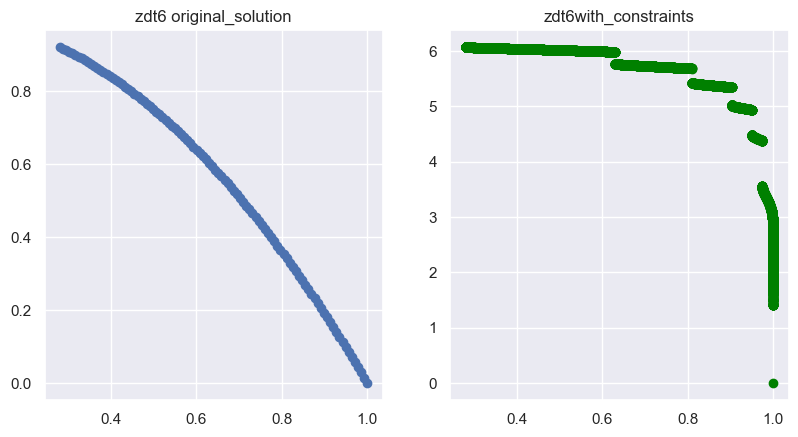

In [5]:
zdt_problems = ['zdt1', 'zdt2', 'zdt3', 'zdt4', 'zdt5', 'zdt6']
zdt_vars     = [30]*3 +[10, 11, 10]
zdt_obj      = [2]*len(zdt_problems)

for i in range(len(zdt_problems)): 
    zdt = get_problem(zdt_problems[i])
    print(zdt_problems[i], 'n_objetivos:', zdt.n_obj, 'n_variables:', zdt.n_var)
    F_orig = zdt.pareto_front()
    #Solución NSGA-II with constraints tras archivar 
    res  = minimize(problem=zdt, 
                    algorithm=nsga2, 
                    termination =termination, 
                    save_history =True)
    X, F = get_full_population(res)
    F_opt, idx = get_best_opt(F)
    
    fig = plt.figure(figsize=plt.figaspect(0.5))
    ax = fig.add_subplot(1, 2, 1)
    ax.scatter(F_orig[:, 0], F_orig[:, 1])
    plt.title(zdt_problems[i]+' original_solution')
    ax = fig.add_subplot(1, 2, 2)
    ax.scatter(F_opt[:, 0], F_opt[:, 1], color='green')
    plt.title(zdt_problems[i]+'with_constraints')
    plt.show()

wfg1 n_objetivos: 3 n_variables: 24


25000it [01:23, 299.35it/s]


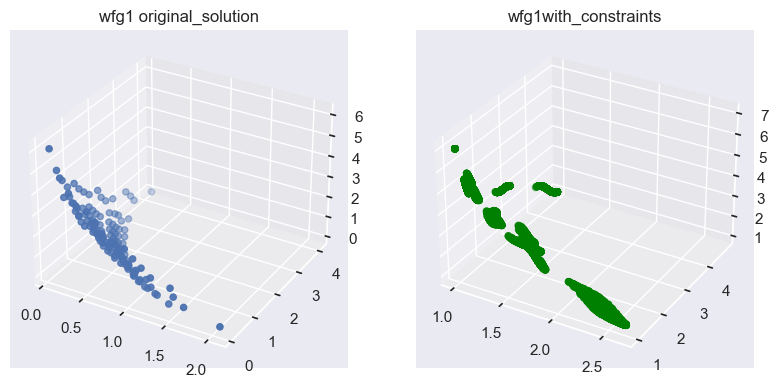

wfg2 n_objetivos: 3 n_variables: 24


25000it [00:02, 10828.99it/s]


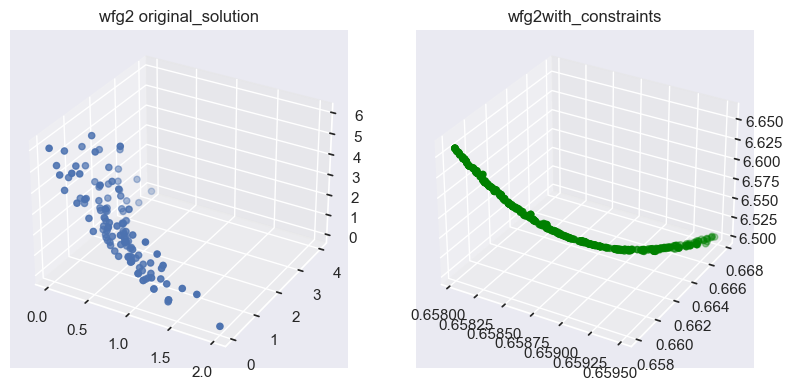

wfg3 n_objetivos: 3 n_variables: 24


25000it [00:09, 2556.23it/s]


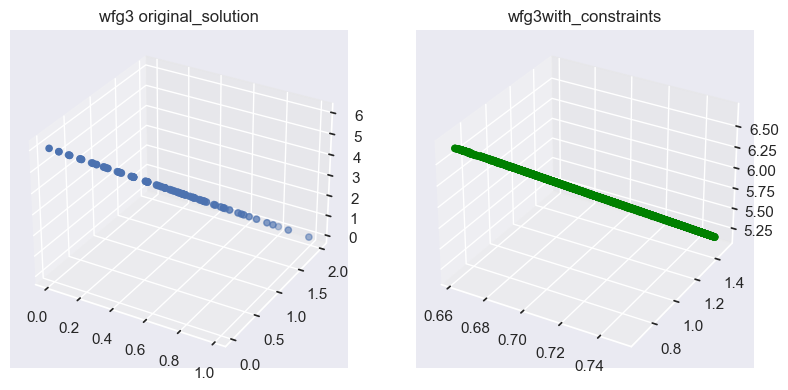

wfg4 n_objetivos: 3 n_variables: 24


25000it [00:09, 2512.28it/s]


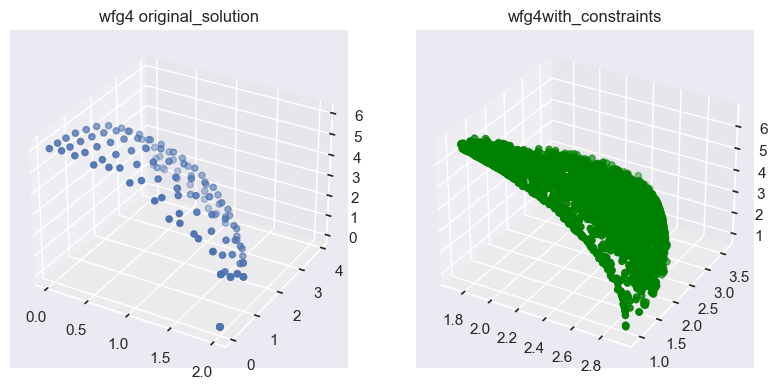

wfg5 n_objetivos: 3 n_variables: 24


25000it [01:02, 399.22it/s]


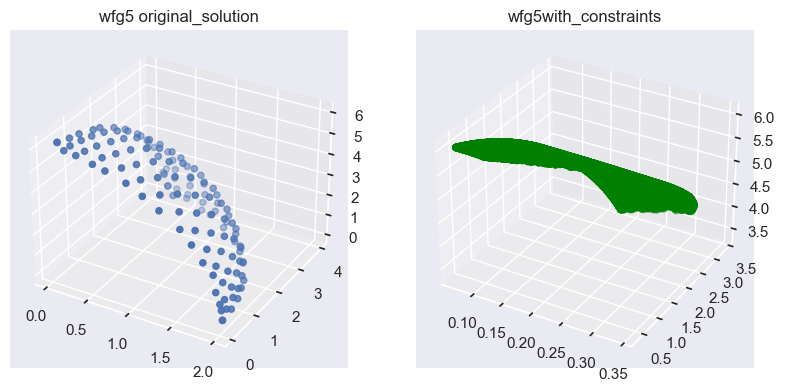

wfg6 n_objetivos: 3 n_variables: 24


25000it [00:26, 945.87it/s] 


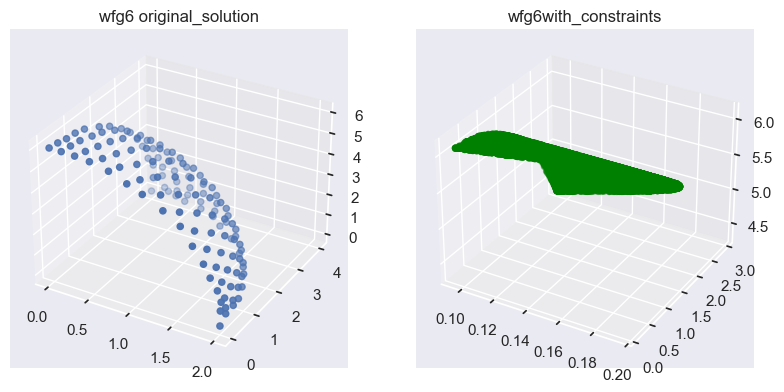

wfg7 n_objetivos: 3 n_variables: 24


25000it [00:21, 1142.40it/s]


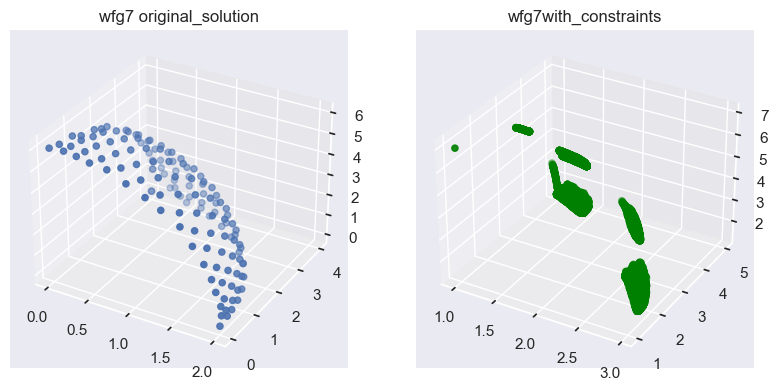

wfg8 n_objetivos: 3 n_variables: 24


25000it [00:00, 29007.56it/s]


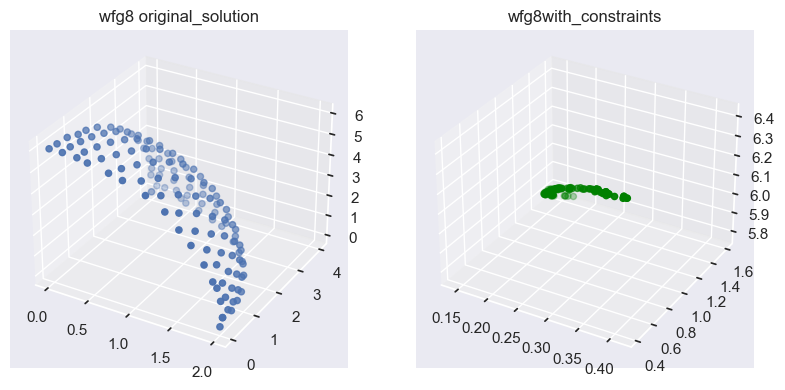

wfg9 n_objetivos: 3 n_variables: 24


25000it [00:02, 11656.86it/s]


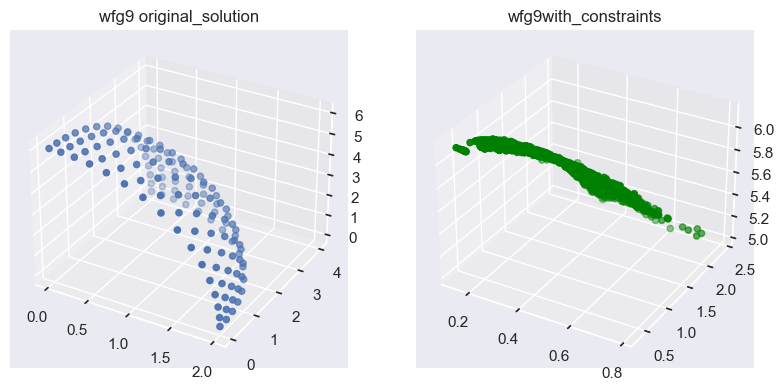

In [6]:
wfg_problems = ['wfg1', 'wfg2', 'wfg3', 'wfg4', 'wfg5', 'wfg6', 'wfg7', 'wfg8', 'wfg9']
wfg_vars     = [24]*len(wfg_problems)
wfg_obj      = [3]*len(wfg_problems)
for i in range(len(wfg_problems)): 
    wfg = get_problem(wfg_problems[i], n_var=wfg_vars[i], n_obj=wfg_obj[i])
    print(wfg_problems[i], 'n_objetivos:', wfg.n_obj, 'n_variables:', wfg.n_var)
    F_orig = wfg.pareto_front()
    #Solución NSGA-II with constraints tras archivar 
    res  = minimize(problem=wfg, 
                    algorithm=nsga2, 
                    termination =termination, 
                    save_history =True)
    X, F = get_full_population(res)
    F_opt, idx = get_best_opt(F)
    
    fig = plt.figure(figsize=plt.figaspect(0.5))
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.scatter(F_orig[:, 0], F_orig[:, 1], F_orig[:, 2])
    plt.title(wfg_problems[i]+' original_solution')
    ax = fig.add_subplot(1, 2, 2, projection='3d')
    ax.scatter(F_opt[:, 0], F_opt[:, 1], F_opt[:, 2], color='green')
    plt.title(wfg_problems[i]+'with_constraints')
    plt.show()